# Finding Heavy Traffic Indicator on I-94

The project is about analysing a dataset about the westbound traffic on the [I-94 Intersttate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available and can be downloaded from [UCI Machine Learning Respository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the week, etc. 

In [40]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# reading in the file using pandas
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [42]:
# let's examine the first five row
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [43]:
# let's examine the last five row
df.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset contain 48204 rows and 9 columns, there are no null values. Each row describe traffic and weather data for specific hour

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

### Changing the datatype to date time

In [45]:
df['date_time'] = pd.to_datetime(df['date_time'])

## Analyzing Traffic Volume

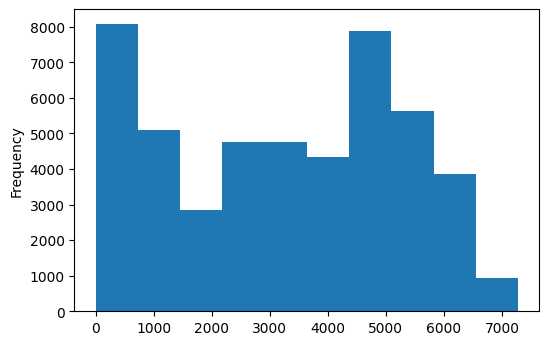

In [46]:
df['traffic_volume'].plot.hist()
plt.show()

In [47]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars

Also, about 25% of the time, there were 1,193 cars or fewer passing the station each hour and about 25% of the time, the traffic volume was four times as much (4,933 cars or more)

There is possibility that nighttime and daytime might influence traffic volume which gives our analysis an interesting direction: comparing daytime with nighttime data


## Traffic Volume: Day vs Night

Therefore we will be dividing the dataset into two parts:

* Daytime data: hours from 7 a.m to 7 p.m (12 hour)

* Nighttime data: hours from 7 p.m to 7 a.m (12 hour

While this is not the perfect criterion for distinguishing between day an night it is a good starting

In [48]:
df['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [49]:
day = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour <19)]
print(day.shape)
night = df.copy()[(df['date_time'].dt.hour >=19) | (df['date_time'].dt.hour <7)]
print(night.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

<function matplotlib.pyplot.show(*args, **kw)>

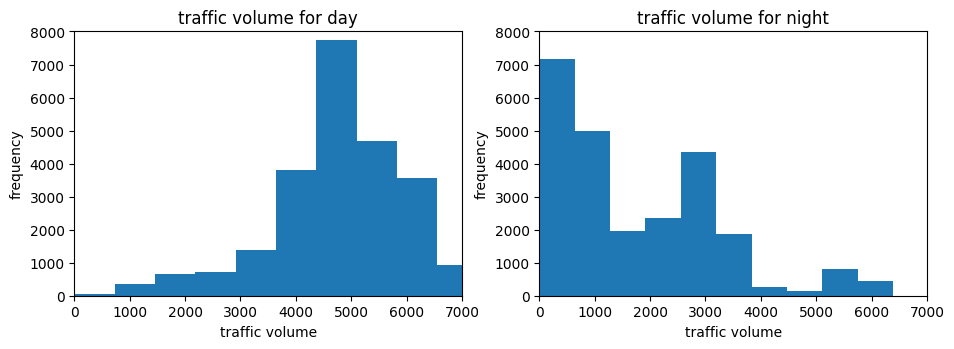

In [50]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('traffic volume for day')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.xlim(0,7000)
plt.ylim(0,8000)
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('traffic volume for night')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.xlim(0,7000)
plt.ylim(0,8000)
plt.show

In [51]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [52]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram shape for the day is left skewed which means most of the value is high while the histogram shape night is right skewed which means most of the values is low

The gaol of our analysis is to find indicators of heavy traffic, from the statistics and graph of the traffic volume for day and night, it shows that the there seems to be less traffic at night. 


## Time Indicator
since we decide to focus on daytime data, one of the possible indicator is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We are going to look at a few line plot show how the volume change according to following;

* month
* day of the week
* time of day

In [53]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

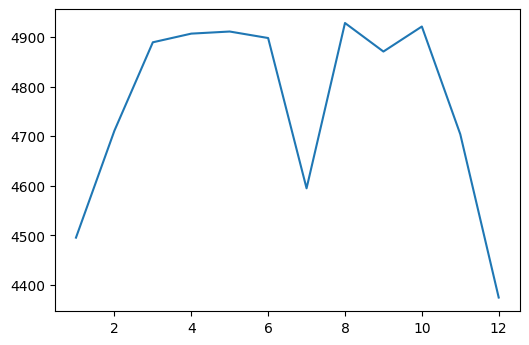

In [54]:
plt.plot(by_month['traffic_volume'])
plt.show()

There seems to be less traffic in jan, july and dec. less traffic in january and december might be due to festives and holiday as it is beagining and end of the year. but the suddden less traffic in july is an exception which needs to be examined  

Typically, the traffic look less heavy during cold month(November- February) and more intense during warm month (March-October). There  seems to be exception for july. Is traffic significantly less in july

To answer this question lets explore the traffic volume for july in each year

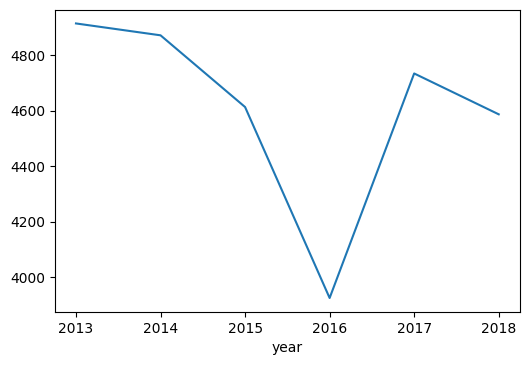

In [55]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month']==7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Traffic is pretty heavy in july. Similarly, compare to other warm month. The only exception is 2016 which can be due to road construction.

Therefore, we can conclude that 

In [56]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

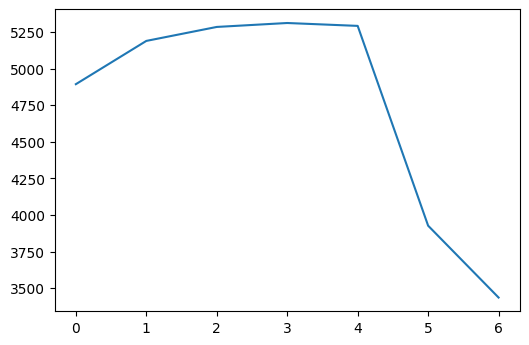

In [57]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show

The line plot shows that there is heavy traffic monday-friday with over 5,000 except on monday which is weekdays/ business days and less traffic on weekends with less than 4,000 cars

In [58]:
day['hour'] = day['date_time'].dt.hour
business_day = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


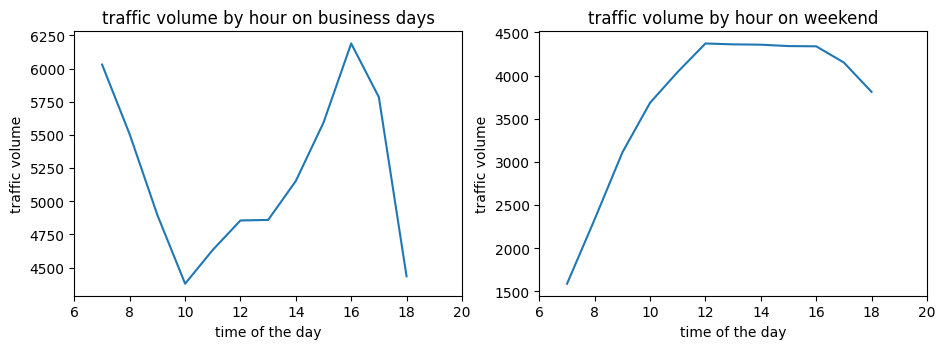

In [63]:
plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylabel('traffic volume')
plt.xlabel('time of the day')
plt.title('traffic volume by hour on business days')
plt.xlim(6,20)
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylabel('traffic volume')
plt.xlabel('time of the day')
plt.title('traffic volume by hour on weekend')
plt.xlim(6,20)
plt.show()


At every hour there seem to be heavy traffic on bsiness days, but the rushing hour is around 7 and 16 with traffic volume of over 6000 o

To summarize,

* The traffic is usually heavier during warm months (March - October) compare to cold months (November - February).
* The traffic is usually heaviear on business days compared to weekends.
* On business days, the rushing hour are around 7 and 16

## Weather indicator

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [65]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

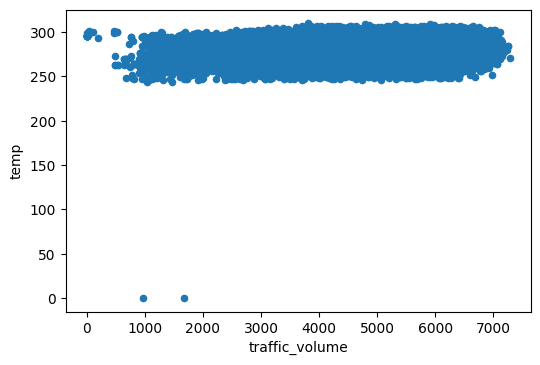

In [69]:
day.plot.scatter('traffic_volume', 'temp')

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

## Weather Types

To start we are going to group data by `weather_main` and look at the `traffic_volume`averages

In [70]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

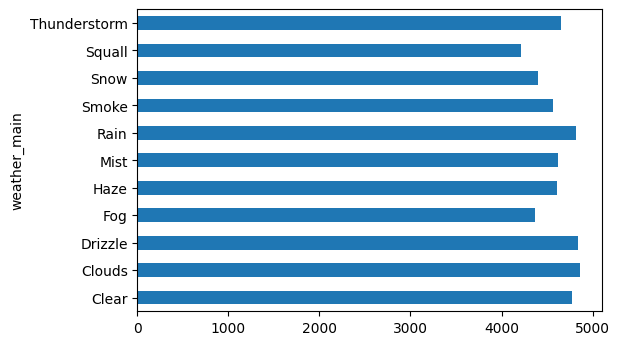

In [75]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

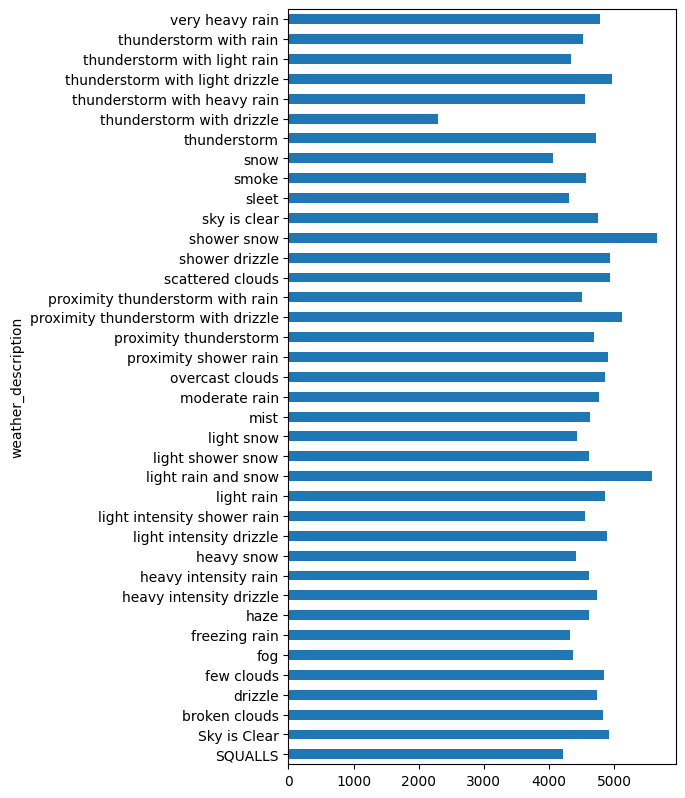

In [78]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
  * The traffic is usually heavier during warm months (March–     October) compared to cold months (November–February).
  * The traffic is usually heavier on business days compared to the weekends.
  * On business days, the rush hours are around 7 and 16.
* Weather indicators
  * Shower snow
  * Light rain and snow
  * Proximity thunderstorm with drizzle